# Text Preprocessing


In [1]:
import nltk
import spacy
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import pandas as pd

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\Users\Andrian
[nltk_data]     Ang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Andrian
[nltk_data]     Ang\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Andrian
[nltk_data]     Ang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Andrian
[nltk_data]     Ang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
df = pd.read_csv("Datasets/tutorial.csv")
df

,review
0,Fantastic spot for an even or a quite cocktail...
1,"Love, love, love the calamari. It's so good an..."
2,"Love this place. Stiff martinis and cocktails,..."
3,It's everything a great cocktail bar should be...
4,"I came here before a pirates game, so it was a..."
...,...
4316,My wife and I caught this show at the Golden N...
4317,This was the dumbest show we have ever seen. ...
4318,My girlfriend and I went to this show. It was ...
4319,The restrooms looked like after an bombardment...


## Case Folding

In [5]:
df['lower_case'] = df['review'].str.lower()
df

,review,lower_case
0,Fantastic spot for an even or a quite cocktail...,fantastic spot for an even or a quite cocktail...
1,"Love, love, love the calamari. It's so good an...","love, love, love the calamari. it's so good an..."
2,"Love this place. Stiff martinis and cocktails,...","love this place. stiff martinis and cocktails,..."
3,It's everything a great cocktail bar should be...,it's everything a great cocktail bar should be...
4,"I came here before a pirates game, so it was a...","i came here before a pirates game, so it was a..."
...,...,...
4316,My wife and I caught this show at the Golden N...,my wife and i caught this show at the golden n...
4317,This was the dumbest show we have ever seen. ...,this was the dumbest show we have ever seen. ...
4318,My girlfriend and I went to this show. It was ...,my girlfriend and i went to this show. it was ...
4319,The restrooms looked like after an bombardment...,the restrooms looked like after an bombardment...


## Tokenization

In [6]:
#NLTK
df['tokens_nltk'] = df['lower_case'].apply(lambda x: word_tokenize(x))
print("Text:", df['lower_case'][0])
print("Tokenization (NLTK):", df['tokens_nltk'][0])

Text: fantastic spot for an even or a quite cocktail.  they were swell to host the yelp crew with a great drink menu and super attentive staff.i'd certainly recommend anything with the purred fruit in it (apple, any of them really)!

Tokenization (NLTK): ['fantastic', 'spot', 'for', 'an', 'even', 'or', 'a', 'quite', 'cocktail', '.', 'they', 'were', 'swell', 'to', 'host', 'the', 'yelp', 'crew', 'with', 'a', 'great', 'drink', 'menu', 'and', 'super', 'attentive', 'staff.i', "'d", 'certainly', 'recommend', 'anything', 'with', 'the', 'purred', 'fruit', 'in', 'it', '(', 'apple', ',', 'any', 'of', 'them', 'really', ')', '!']


In [7]:
#SPACY
#python -m spacy download en_core_web_sm 
nlp = spacy.load("en_core_web_sm")

In [8]:
df['tokens_spacy'] = list(nlp.pipe(df['lower_case']))
df['tokens_spacy'] = df['tokens_spacy'].apply(lambda doc: [token.text for token in doc])
print("Text:", df['lower_case'][0])
print("Tokenization (SpaCy):", df['tokens_spacy'][0])

Text: fantastic spot for an even or a quite cocktail.  they were swell to host the yelp crew with a great drink menu and super attentive staff.i'd certainly recommend anything with the purred fruit in it (apple, any of them really)!

Tokenization (SpaCy): ['fantastic', 'spot', 'for', 'an', 'even', 'or', 'a', 'quite', 'cocktail', '.', ' ', 'they', 'were', 'swell', 'to', 'host', 'the', 'yelp', 'crew', 'with', 'a', 'great', 'drink', 'menu', 'and', 'super', 'attentive', "staff.i'd", 'certainly', 'recommend', 'anything', 'with', 'the', 'purred', 'fruit', 'in', 'it', '(', 'apple', ',', 'any', 'of', 'them', 'really', ')', '!', '\n']


## Stemming

In [9]:
def stem(tokens_nltk):
    stemmer = PorterStemmer()
    stems = [stemmer.stem(word) for word in tokens_nltk]
    return stems
df['stems_nltk'] = df['tokens_nltk'].apply(lambda x: stem(x))
print("Tokenization (NLTK):", df['tokens_nltk'][0])
print("Stemming:", df['stems_nltk'][0])

df['stems_spacy'] = df['tokens_spacy'].apply(lambda x: stem(x))
print("Tokenization (SpaCy):", df['tokens_spacy'][0])
print("Stemming:", df['stems_spacy'][0])

Tokenization (NLTK): ['fantastic', 'spot', 'for', 'an', 'even', 'or', 'a', 'quite', 'cocktail', '.', 'they', 'were', 'swell', 'to', 'host', 'the', 'yelp', 'crew', 'with', 'a', 'great', 'drink', 'menu', 'and', 'super', 'attentive', 'staff.i', "'d", 'certainly', 'recommend', 'anything', 'with', 'the', 'purred', 'fruit', 'in', 'it', '(', 'apple', ',', 'any', 'of', 'them', 'really', ')', '!']
Stemming: ['fantast', 'spot', 'for', 'an', 'even', 'or', 'a', 'quit', 'cocktail', '.', 'they', 'were', 'swell', 'to', 'host', 'the', 'yelp', 'crew', 'with', 'a', 'great', 'drink', 'menu', 'and', 'super', 'attent', 'staff.i', "'d", 'certainli', 'recommend', 'anyth', 'with', 'the', 'pur', 'fruit', 'in', 'it', '(', 'appl', ',', 'ani', 'of', 'them', 'realli', ')', '!']
Tokenization (SpaCy): ['fantastic', 'spot', 'for', 'an', 'even', 'or', 'a', 'quite', 'cocktail', '.', ' ', 'they', 'were', 'swell', 'to', 'host', 'the', 'yelp', 'crew', 'with', 'a', 'great', 'drink', 'menu', 'and', 'super', 'attentive', "st

## Lemmatization

In [10]:
def lemma(tokens_nltk):
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(word, pos="v") for word in tokens_nltk]
    return lemmas
df['lemmas_nltk'] = df['tokens_nltk'].apply(lambda x: lemma(x))
print("Tokenization (NLTK):", df['tokens_nltk'][0])
print("Lemmatization:", df['lemmas_nltk'][0])

df['lemmas_spacy'] = df['tokens_spacy'].apply(lambda x: lemma(x))
print("Tokenization (SpaCy):", df['tokens_spacy'][0])
print("Lemmatization:", df['lemmas_spacy'][0])

Tokenization (NLTK): ['fantastic', 'spot', 'for', 'an', 'even', 'or', 'a', 'quite', 'cocktail', '.', 'they', 'were', 'swell', 'to', 'host', 'the', 'yelp', 'crew', 'with', 'a', 'great', 'drink', 'menu', 'and', 'super', 'attentive', 'staff.i', "'d", 'certainly', 'recommend', 'anything', 'with', 'the', 'purred', 'fruit', 'in', 'it', '(', 'apple', ',', 'any', 'of', 'them', 'really', ')', '!']
Lemmatization: ['fantastic', 'spot', 'for', 'an', 'even', 'or', 'a', 'quite', 'cocktail', '.', 'they', 'be', 'swell', 'to', 'host', 'the', 'yelp', 'crew', 'with', 'a', 'great', 'drink', 'menu', 'and', 'super', 'attentive', 'staff.i', "'d", 'certainly', 'recommend', 'anything', 'with', 'the', 'purr', 'fruit', 'in', 'it', '(', 'apple', ',', 'any', 'of', 'them', 'really', ')', '!']
Tokenization (SpaCy): ['fantastic', 'spot', 'for', 'an', 'even', 'or', 'a', 'quite', 'cocktail', '.', ' ', 'they', 'were', 'swell', 'to', 'host', 'the', 'yelp', 'crew', 'with', 'a', 'great', 'drink', 'menu', 'and', 'super', 'a

## Remove Stopwords

In [11]:
def stop_w(tokens_nltk):
    stop_words = set(stopwords.words("english"))
    tokens_filtered = [word for word in tokens_nltk if word.lower() not in stop_words]
    return tokens_filtered
df['remove_stop_words_nltk'] = df['tokens_nltk'].apply(lambda x: stop_w(x))
print("Tokenization (NLTK):", df['tokens_nltk'][0])
print("Stopword Removal:", df['remove_stop_words_nltk'][0])

df['remove_stop_words_spacy'] = df['tokens_spacy'].apply(lambda x: stop_w(x))
print("Tokenization (SpaCy):", df['tokens_spacy'][0])
print("Stopword Removal:", df['remove_stop_words_spacy'][0])

Tokenization (NLTK): ['fantastic', 'spot', 'for', 'an', 'even', 'or', 'a', 'quite', 'cocktail', '.', 'they', 'were', 'swell', 'to', 'host', 'the', 'yelp', 'crew', 'with', 'a', 'great', 'drink', 'menu', 'and', 'super', 'attentive', 'staff.i', "'d", 'certainly', 'recommend', 'anything', 'with', 'the', 'purred', 'fruit', 'in', 'it', '(', 'apple', ',', 'any', 'of', 'them', 'really', ')', '!']
Stopword Removal: ['fantastic', 'spot', 'even', 'quite', 'cocktail', '.', 'swell', 'host', 'yelp', 'crew', 'great', 'drink', 'menu', 'super', 'attentive', 'staff.i', "'d", 'certainly', 'recommend', 'anything', 'purred', 'fruit', '(', 'apple', ',', 'really', ')', '!']
Tokenization (SpaCy): ['fantastic', 'spot', 'for', 'an', 'even', 'or', 'a', 'quite', 'cocktail', '.', ' ', 'they', 'were', 'swell', 'to', 'host', 'the', 'yelp', 'crew', 'with', 'a', 'great', 'drink', 'menu', 'and', 'super', 'attentive', "staff.i'd", 'certainly', 'recommend', 'anything', 'with', 'the', 'purred', 'fruit', 'in', 'it', '(', '

## Word Cloud

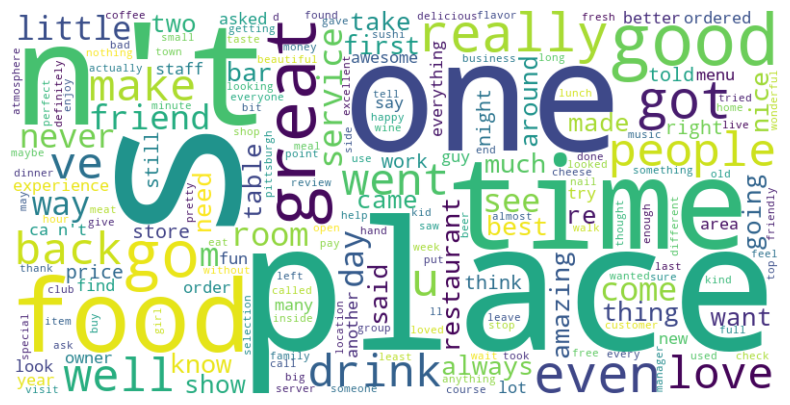

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = " ".join([" ".join(words) for words in df['remove_stop_words_nltk']])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  
plt.show()


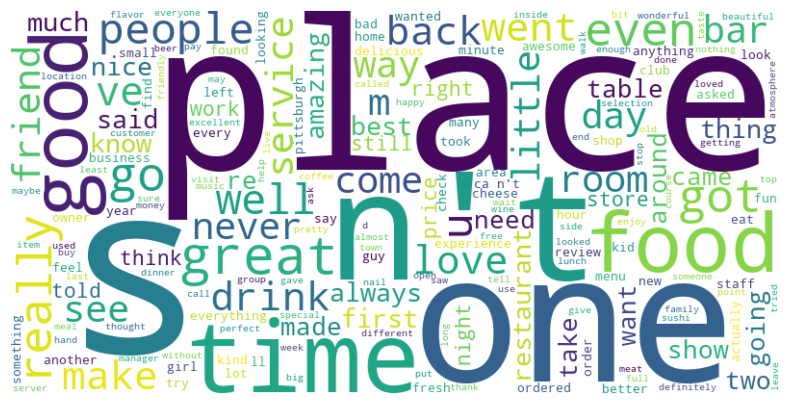

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = " ".join([" ".join(words) for words in df['remove_stop_words_spacy']])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()